# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

# Data integrity

# Signal

In [4]:
# num = carry_returns.pipe(fill_date, True)
# denom = spot_returns.pipe(fill_date, True).pipe(rolling_vol, 21*3)
# signal = (num/denom).pipe(demean_xs).pipe(top_bottom_xs, len(universe)//4).pipe(np.sign)
# sig = signal * (1/spot_returns.pipe(fill_date, True).pipe(rolling_vol, 21*6))

In [4]:
num = carry_returns.pipe(fill_date, True) ### historical returns from carry
denom = spot_returns.pipe(fill_date, True).pipe(rolling_vol, 21*3) ### volatility of spot returns
signal = (num/denom).pipe(omit_leading_na, "any").pipe(high_minus_low) 
sig = signal * (1/spot_returns.pipe(fill_date, True).pipe(rolling_vol, 21*6)) ### magnitude is 1/vol

# Backtest Daily Rebal

## Use cov

In [5]:
daily_bt_cov = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"use_cov":True})
daily_bt_cov.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling (using cov-matrix)...


In [6]:
get_summary(daily_bt_cov)

Returns   : 0.04177131681162259
Vol       : 0.10847216821038569
SR        : 0.3850878755424674
Max DD    : -46.41

C Returns : 0.03652444708358701
C SR      : 0.29905886876182625
C Max DD  : -39.95

Hit rate  : 0.529
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.12


In [7]:
get_returns_stats(daily_bt_cov.asset_rtn, daily_bt_cov.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF
annualized_return,1.126081,-1.309042,2.136506,0.076026,0.329602,1.683826,0.979648,0.629852,-1.463264
sharpe,0.271774,-0.293517,0.464222,0.023948,0.056672,0.410907,0.379572,0.18049,-0.264418
dollar_sharpe,0.251018,-0.305245,0.467029,0.009974,0.028131,0.350501,0.375837,0.145487,-0.318398
trade_sharpe,0.438831,-0.030647,0.774163,-0.585539,0.476346,0.787768,0.620139,0.334425,-0.078687
long_sharpe,4.853428,0.154241,0.774163,-0.960371,0.692923,NaN,1.342701,-2.540362,0.318748
short_sharpe,0.406327,-0.048133,NaN,0.012878,-0.033061,0.787768,0.602194,0.350277,-1.18099
sortino,0.14376,-0.104292,0.243643,0.008202,0.031703,0.215692,0.121216,0.071145,-0.153532
max_drawdown,-12.110322,-28.021577,-13.229029,-19.213984,-18.813805,-12.220572,-8.675568,-18.487967,-39.363347
max_drawdown_start,2013-01-22,2011-05-03,2010-06-07,2007-12-03,2002-02-08,2007-07-24,2003-09-24,2003-01-17,2001-07-05
max_drawdown_end,2015-04-06,2016-12-02,2014-04-10,2013-01-11,2005-01-14,2015-07-16,2008-09-17,2016-12-30,2013-10-24


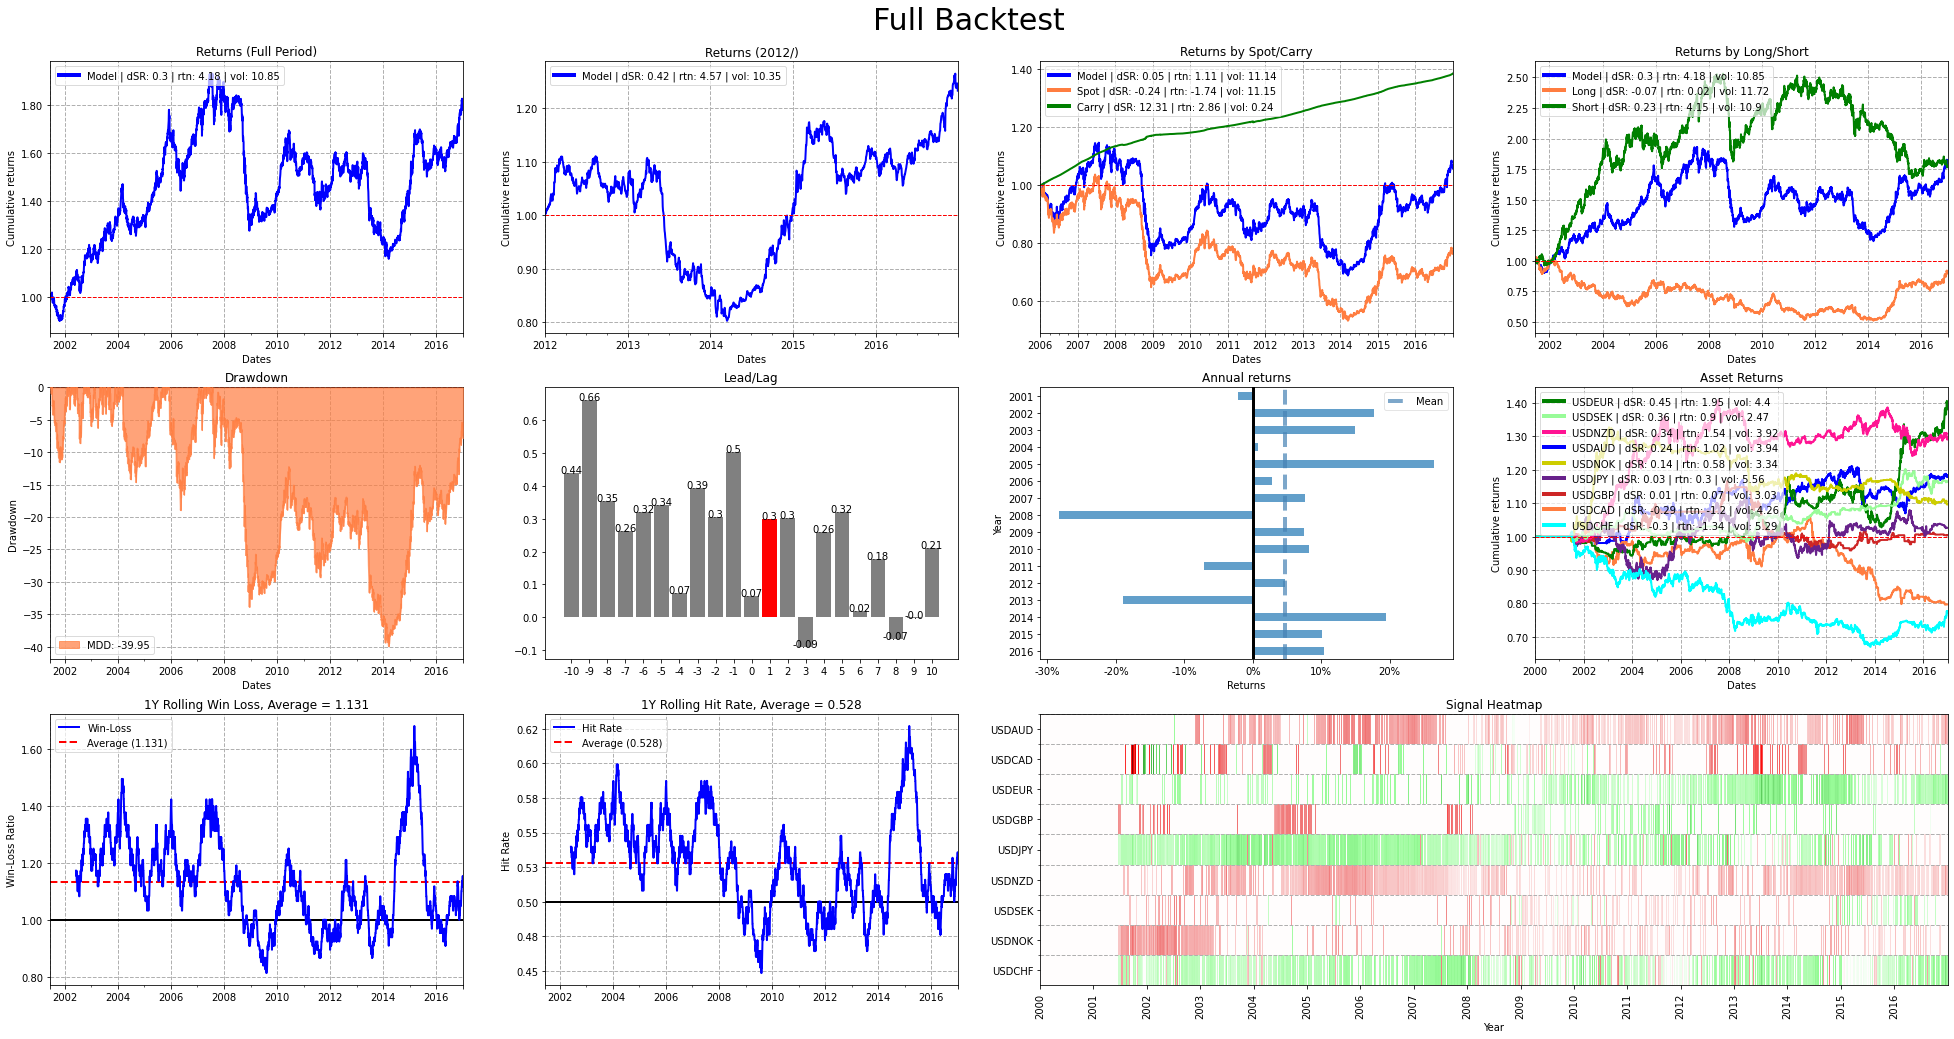

In [9]:
plot_bt(daily_bt_cov)

## Use scaler

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Returns   : 0.06485498551356784
Vol       : 0.10691709831070004
SR        : 0.6065913360751701
Max DD    : -40.76

C Returns : 0.06091639979530058
C SR      : 0.5062028237278442
C Max DD  : -35.13

Hit rate  : 0.529
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.12


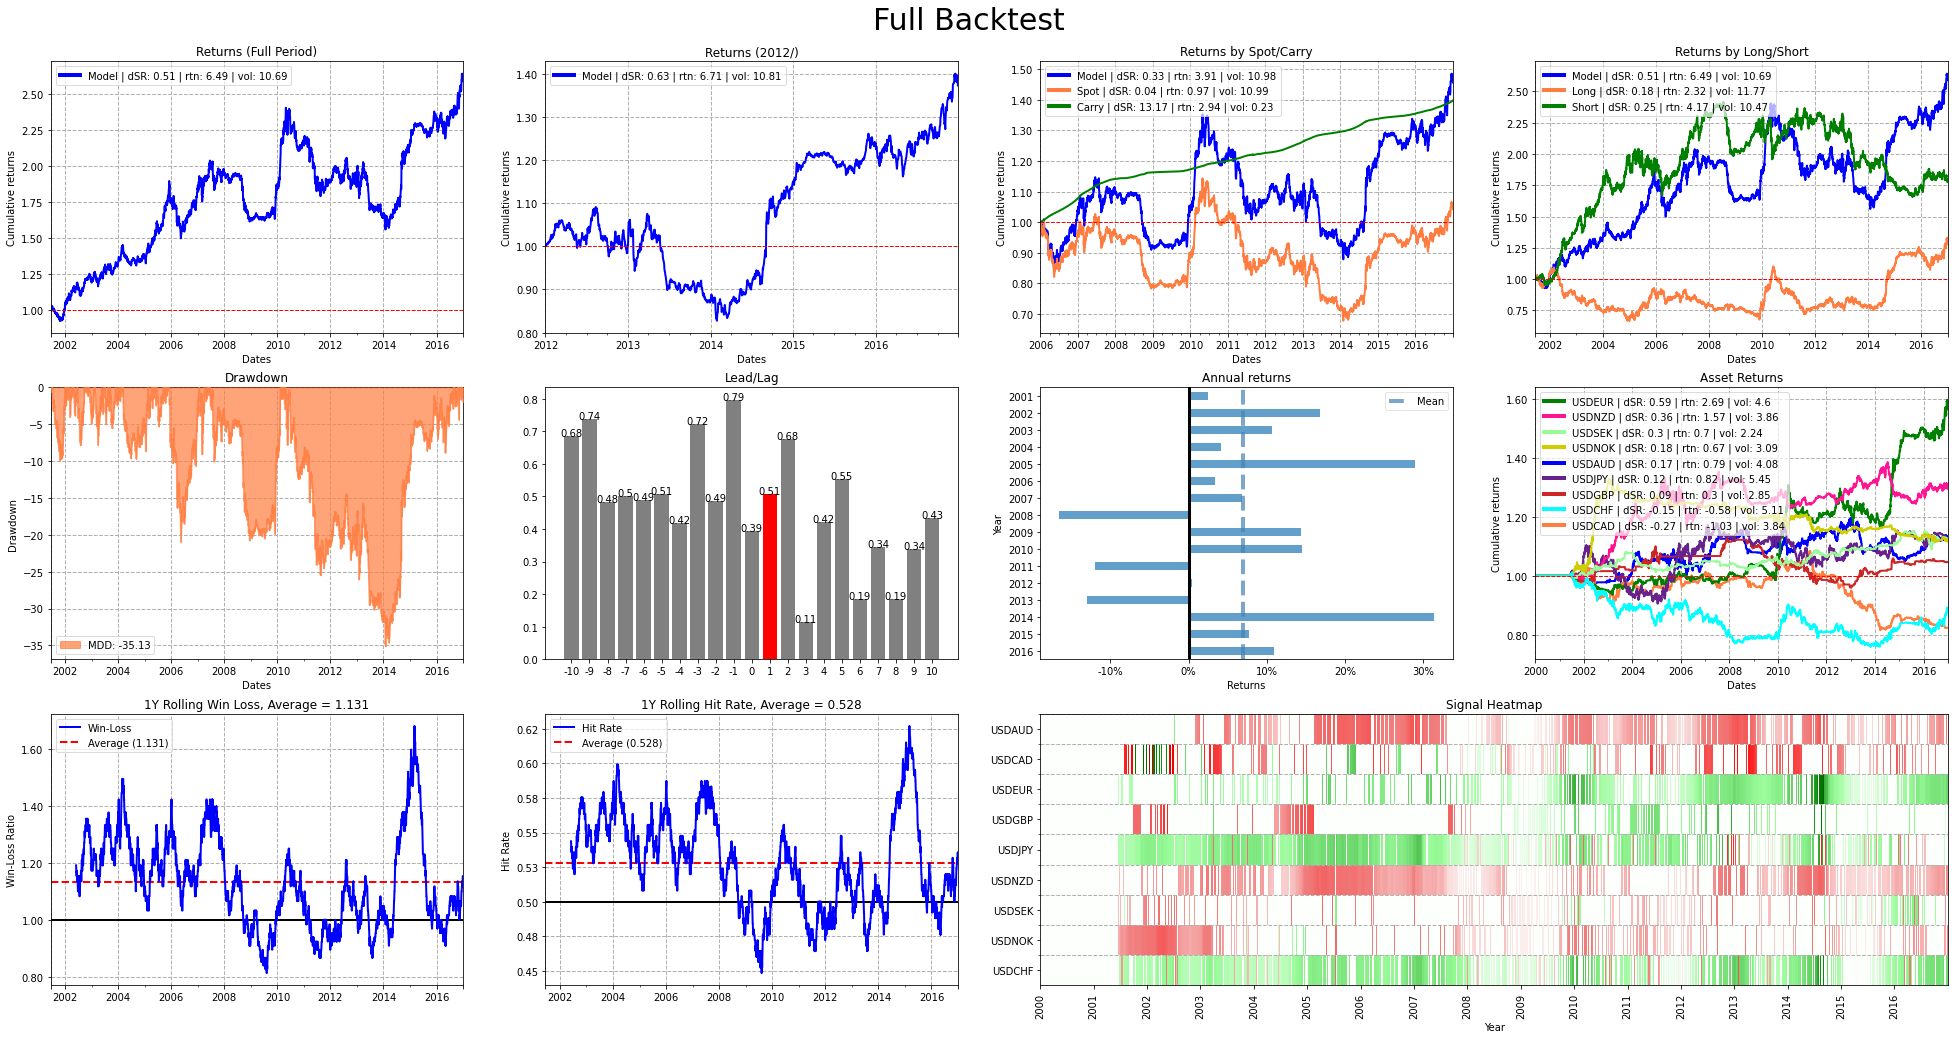

In [10]:
daily_bt = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"use_cov":False})
daily_bt.run()
get_summary(daily_bt)
plot_bt(daily_bt)

# Backtest Weekly Rebal

## With cov

In [11]:
weekly_bt_cov = Backtest(signal = sig, 
                         asset_returns = total_returns, 
                         tcost = abs(total_returns*0), 
                         settings = settings,
                         settings_inject = {"rebalance_period":"friday", "use_cov":True})
weekly_bt_cov.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling (using cov-matrix)...


In [12]:
get_summary(weekly_bt_cov)

Returns   : 0.06616042919806035
Vol       : 0.11179230868716211
SR        : 0.5918155727797222
Max DD    : -32.98

C Returns : 0.06172758098045989
C SR      : 0.5015336257497588
C Max DD  : -29.1

Hit rate  : 0.529
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.12


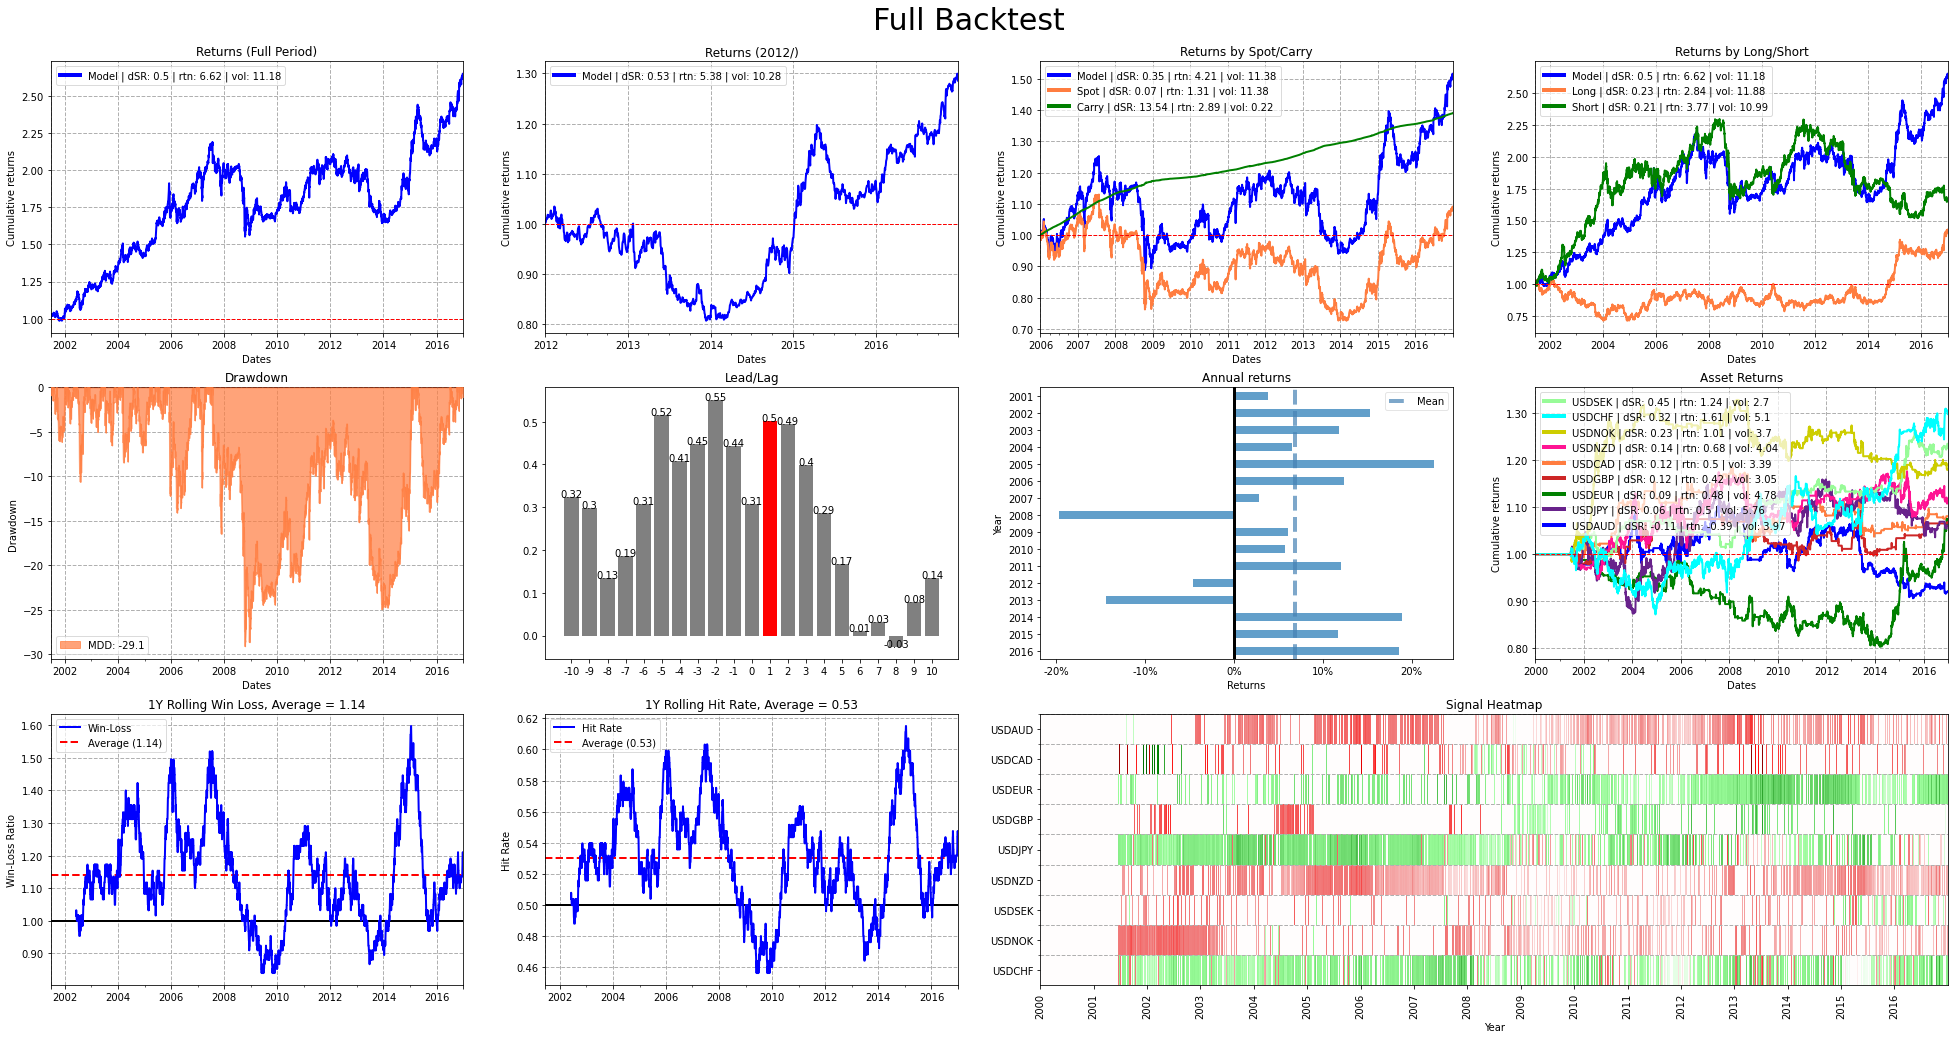

In [18]:
plot_bt(weekly_bt_cov)

## Use scaler

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Returns   : 0.07850960671519287
Vol       : 0.1063176405209964
SR        : 0.7384438398977469
Max DD    : -25.01

C Returns : 0.07555945763312749
C SR      : 0.6613742096761748
C Max DD  : -22.75

Hit rate  : 0.529
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.12


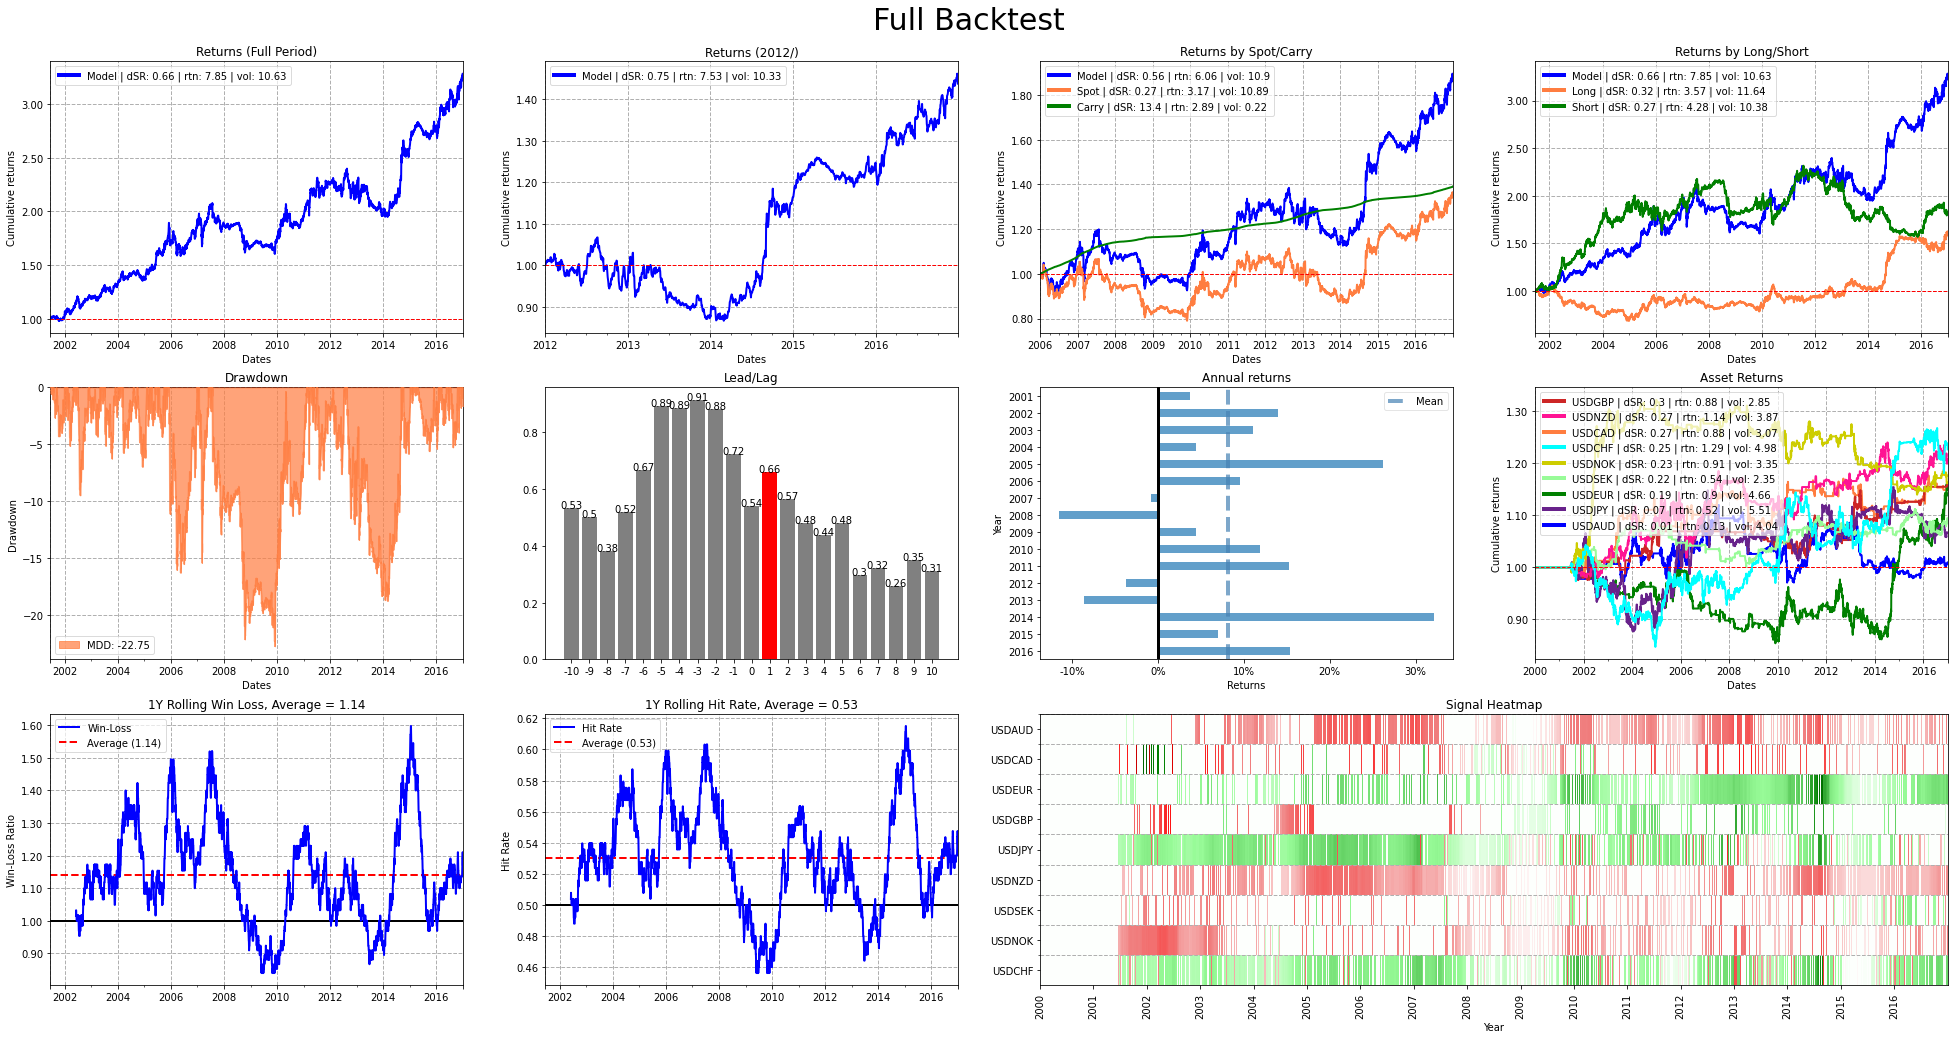

In [19]:
weekly_bt = Backtest(signal = sig, 
                     asset_returns = total_returns, 
                     tcost = abs(total_returns*0), 
                     settings = settings,
                     settings_inject = {"rebalance_period":"friday", "use_cov":False})
weekly_bt.run()
get_summary(weekly_bt)
plot_bt(weekly_bt)

# Daily vs Weekly 

<AxesSubplot:title={'center':'Daily vs Weekly Rebal'}, xlabel='Dates', ylabel='Cumulative returns'>

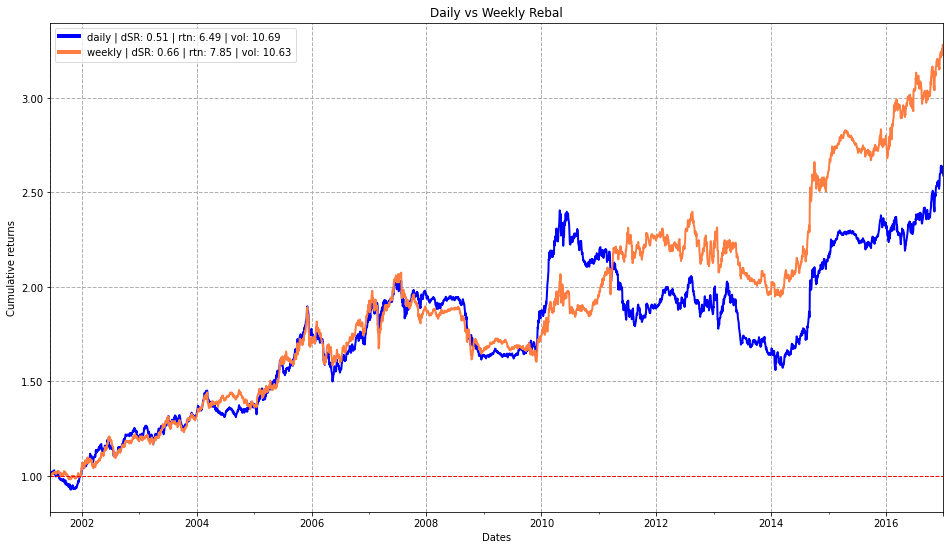

In [20]:
gen_plot_rtn(pd.concat([daily_bt.model_rtn.rename("daily"), weekly_bt.model_rtn.rename("weekly")], axis=1), main = "Daily vs Weekly Rebal")

In [21]:
# pickle.dump(daily_bt_cov, open("../BT/carry_tovol_g10_cov_daily.p", "wb"))
# daily_bt_cov = pickle.load(open("../BT/carry_tovol_g10_cov_daily.p", "rb"))

# pickle.dump(weekly_bt_cov, open("../BT/carry_tovol_g10_cov_weekly.p", "wb"))
# weekly_bt_cov = pickle.load(open("../BT/carry_tovol_g10_cov_weekly.p", "rb"))

# pickle.dump(daily_bt, open("../BT/carry_tovol_g10_daily.p", "wb"))
# daily_bt = pickle.load(open("../BT/carry_tovol_g10_daily.p", "rb"))

# pickle.dump(weekly_bt, open("../BT/carry_tovol_g10_weekly.p", "wb"))
# weekly_bt = pickle.load(open("../BT/carry_tovol_g10_weekly.p", "rb"))

# Regime Plot

# Sensitivity Analysis